In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor,kernels
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from src.models.constants import Constants
from src.models import util

In [5]:
plt.style.use('seaborn-v0_8-talk')
cmap = plt.get_cmap("tab10")
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Incl. Rnd 1",3:"Incl. Rnd 2",4:"Incl. Rnd 3",5:"Incl. Rnd 4"}
seed=0
fname = f'3-averaged_Round{5}-Standardized.csv' #Data through Round 4
f = processed_dir+"/"+fname
df = pd.read_csv(f,index_col=0)
df.head()

,Pt,Sn,Ga,Fe,Cu,Ca,Mn,Zn,k_d,Y0,lifetime_yield,Y_pc,sqrtY0Y_pc,lifetime_yield_sd,Y_pc_sd,sqrtY0Y_pc_sd
0,1,0,0,0,0,0,0,0,0.009888,0.079167,7.906378,7.122892,0.749430,1.391523,0.117528,0.012366
1,1,0,0,0,0,1,0,0,0.006639,0.052747,7.944507,6.330042,0.577835,1.398233,0.104446,0.009534
2,1,0,0,0,0,4,0,0,0.005610,0.211910,37.771519,27.945063,2.433485,6.647787,0.461094,0.040152
3,1,0,0,0,0,8,0,0,0.006555,0.162041,24.720653,19.593907,1.781855,4.350835,0.323299,0.029401
4,1,0,0,0,1,0,0,0,0.006305,0.211454,33.538397,26.152810,2.351620,5.902758,0.431521,0.038802


In [43]:
X,y=util.get_Xy(df)
print(f'Num Samples: {X.shape[0]}, Num Features: {X.shape[1]}')
X.head()
print(f'Range of y: {max(y)-min(y):.3} Mean of y: {y.mean():.3} SD of y: {y.std():.3}')

Num Samples: 50, Num Features: 7
Range of y: 4.26 Mean of y: 3.14 SD of y: 1.23


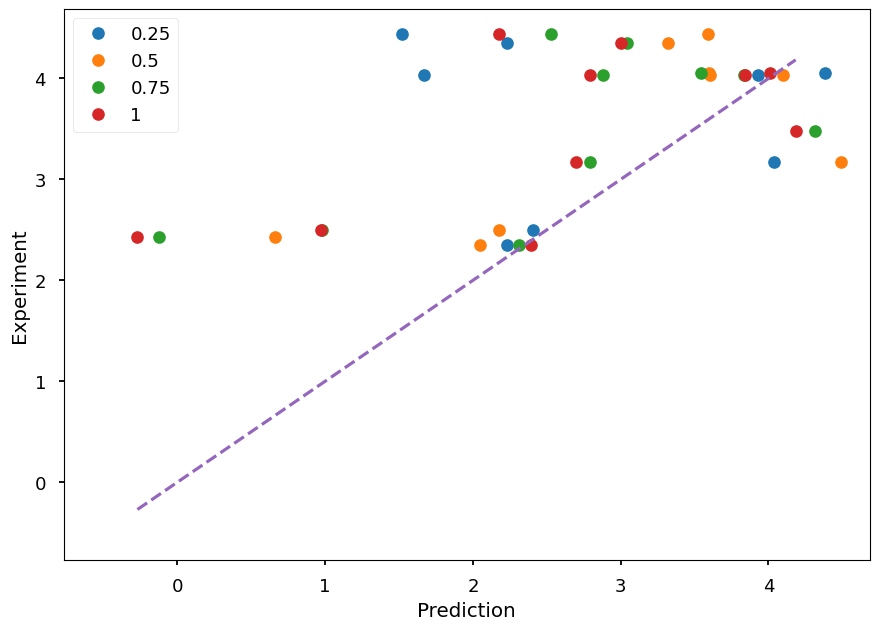

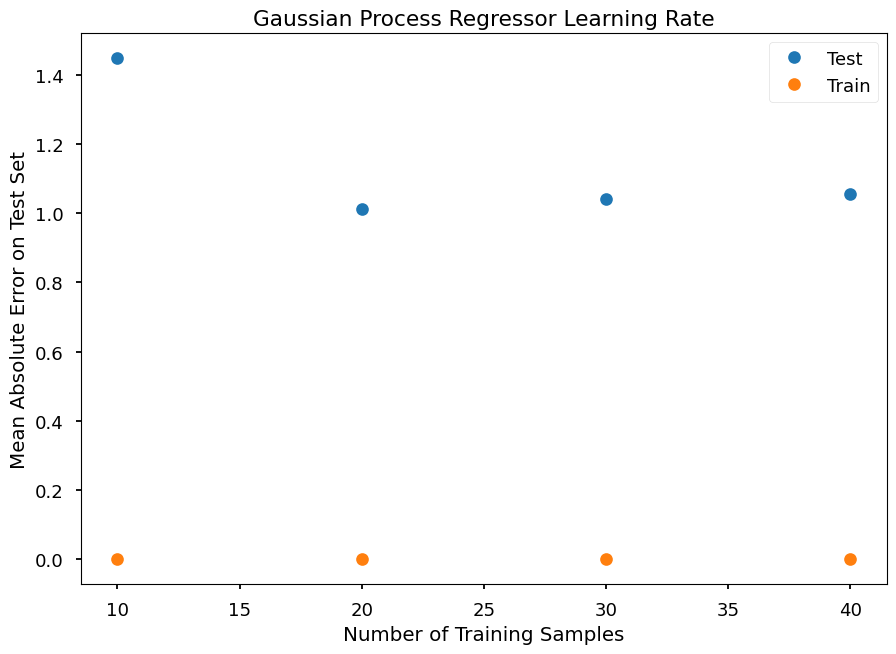

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline = make_pipeline(GaussianProcessRegressor(kernel=1*kernels.RBF(length_scale=1.0,length_scale_bounds=(1e-2,1e2)),n_restarts_optimizer=5,random_state=seed))
train_scores = []
test_scores = []
fractions = [0.25,0.5,0.75,1]
samples = []
for fraction in fractions:
    n_X_train = X_train.shape[0]
    random.seed(seed)
    n_samples = round(fraction*n_X_train)
    samples.append(n_samples)
    sampled_indices = random.sample(range(n_X_train),k=n_samples)
    X_train_fractional = X_train.iloc[sampled_indices]
    y_train_fractional = y_train.iloc[sampled_indices]
    pipeline.fit(X_train_fractional,y_train_fractional)
    y_train_pred=pipeline.predict(X_train_fractional)
    y_test_pred=pipeline.predict(X_test)
    
    train_scores.append(mean_absolute_error(y_train_fractional,y_train_pred))
    test_scores.append(mean_absolute_error(y_test,y_test_pred))

    plt.plot(y_test_pred,y_test,'o',label=fraction)
plt.plot([min(y_test_pred),max(y_test_pred)],[min(y_test_pred),max(y_test_pred)],'--')
plt.legend(loc='best')
plt.xlabel("Prediction")
plt.ylabel("Experiment")
plt.xlim((min(y_test_pred)-.5,max(y_test_pred)+.5))
plt.ylim((min(y_test_pred)-.5,max(y_test_pred)+.5))
plt.show()


plt.plot(samples,test_scores,'o',label="Test")
plt.plot(samples,train_scores,'o',label="Train")
plt.legend(loc='best')
plt.xlabel("Number of Training Samples")
plt.ylabel("Mean Absolute Error on Test Set")
plt.title("Gaussian Process Regressor Learning Rate")
plt.savefig("./figures/learning_rate_gp.png",dpi=600,bbox_inches='tight')
plt.show()
    



In [12]:
#learning rate

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.

